In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

# 1. GEETING THE DATA

In [5]:
cnx = sqlite3.connect('database.sqlite')

In [6]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head() 

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
df.shape

(183978, 42)

In [9]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [10]:
### UNDERSTANDING NUMERICAL AND CATEGORCAL VARIABLES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [11]:
## seprating the categorical and numerical variables

In [12]:
categorical_var = [feature for feature in df.columns if df[feature].dtype == 'object']

In [13]:
categorical_var

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [14]:
### LETS EXPLORE EACH CATEGORICAL VARIABLE AND UNDERSTAND ITS TYPE I.E NOMINAL ORDINAL

In [28]:
##1. preffered foot

df['preferred_foot'].value_counts()

# THIS LOOKS LIKE A NOMINAL VARIABLE WHERE ORDER DOESNT MATTER

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [ ]:
##2.attacking_work_rate

In [18]:
df['attacking_work_rate'].value_counts()

# THIS IS AN ORDINAL FEATURE

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [ ]:
##3. defensive_work_rate

In [19]:
df['defensive_work_rate'].value_counts()

# THIS ALSO IS AN ORDINAL VARIABLE

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [21]:
# CHECK EACH OF THESE COLUMNS NULL VALUE

In [22]:
categorical_var

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [35]:
a = np.where(df['preferred_foot'].isnull())

In [38]:
len(a[0])

836

In [31]:
df['attacking_work_rate'].isnull().sum()

3230

In [39]:
df['defensive_work_rate'].isnull().sum()

836

In [40]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

# OBSERVATIONS-
1. IN preferred_foot we have more than double right footed players than left footed we have 836 missing values
2. IN attacking_work_rate WE HAVE more medium,high,low rest are none and can be comibined, it has 3230 missing values
3. IN defensive_work_rate WE HAVE MORE edium,high,low rest are none and can be comibined, 836 missing values

In [20]:
categorical_var

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# VISUALIZATION

C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='preferred_foot', ylabel='balance'>

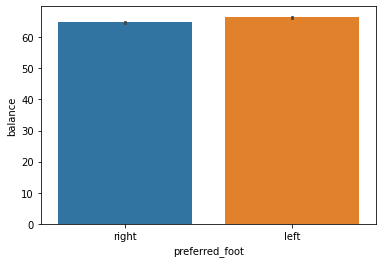

In [52]:
sns.barplot('preferred_foot','balance',data= df)

# 3. HANDLING NULL VALUES

In [53]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [56]:
features_with_nan = [{feature: df[feature].isnull().sum()} for feature in df.columns if df[feature].isnull().sum() >1]

In [57]:
features_with_nan

[{'overall_rating': 836},
 {'potential': 836},
 {'preferred_foot': 836},
 {'attacking_work_rate': 3230},
 {'defensive_work_rate': 836},
 {'crossing': 836},
 {'finishing': 836},
 {'heading_accuracy': 836},
 {'short_passing': 836},
 {'volleys': 2713},
 {'dribbling': 836},
 {'curve': 2713},
 {'free_kick_accuracy': 836},
 {'long_passing': 836},
 {'ball_control': 836},
 {'acceleration': 836},
 {'sprint_speed': 836},
 {'agility': 2713},
 {'reactions': 836},
 {'balance': 2713},
 {'shot_power': 836},
 {'jumping': 2713},
 {'stamina': 836},
 {'strength': 836},
 {'long_shots': 836},
 {'aggression': 836},
 {'interceptions': 836},
 {'positioning': 836},
 {'vision': 2713},
 {'penalties': 836},
 {'marking': 836},
 {'standing_tackle': 836},
 {'sliding_tackle': 2713},
 {'gk_diving': 836},
 {'gk_handling': 836},
 {'gk_kicking': 836},
 {'gk_positioning': 836},
 {'gk_reflexes': 836}]

# DEALING WITH NUMERICAL NAN FEATURES FIRST

In [64]:
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [67]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

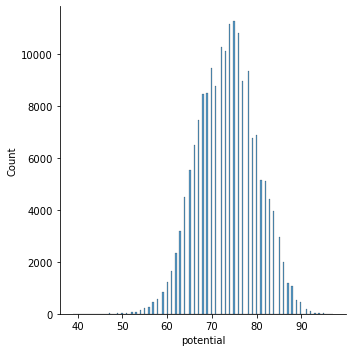

In [65]:
sns.displot(data = df, x = 'potential',kind = 'hist')

# NORMALLY DISTRIBUTED DATA so if NAN VALUES ARE PRESENT WE CAN replace nan values with mean

In [70]:
numerical_var = [feature for feature in df.columns if df[feature].dtype!='object']

In [71]:
numerical_var

['id',
 'player_fifa_api_id',
 'player_api_id',
 'overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

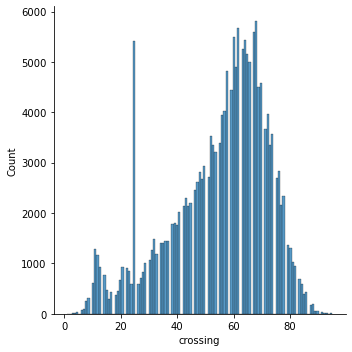

In [72]:
sns.displot(data = df, x = 'crossing',kind = 'hist')

# THIS IS LEFT SKEWED DATA SO WE WILL REPLACE NAN VALUES WITH MEDIAN

C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

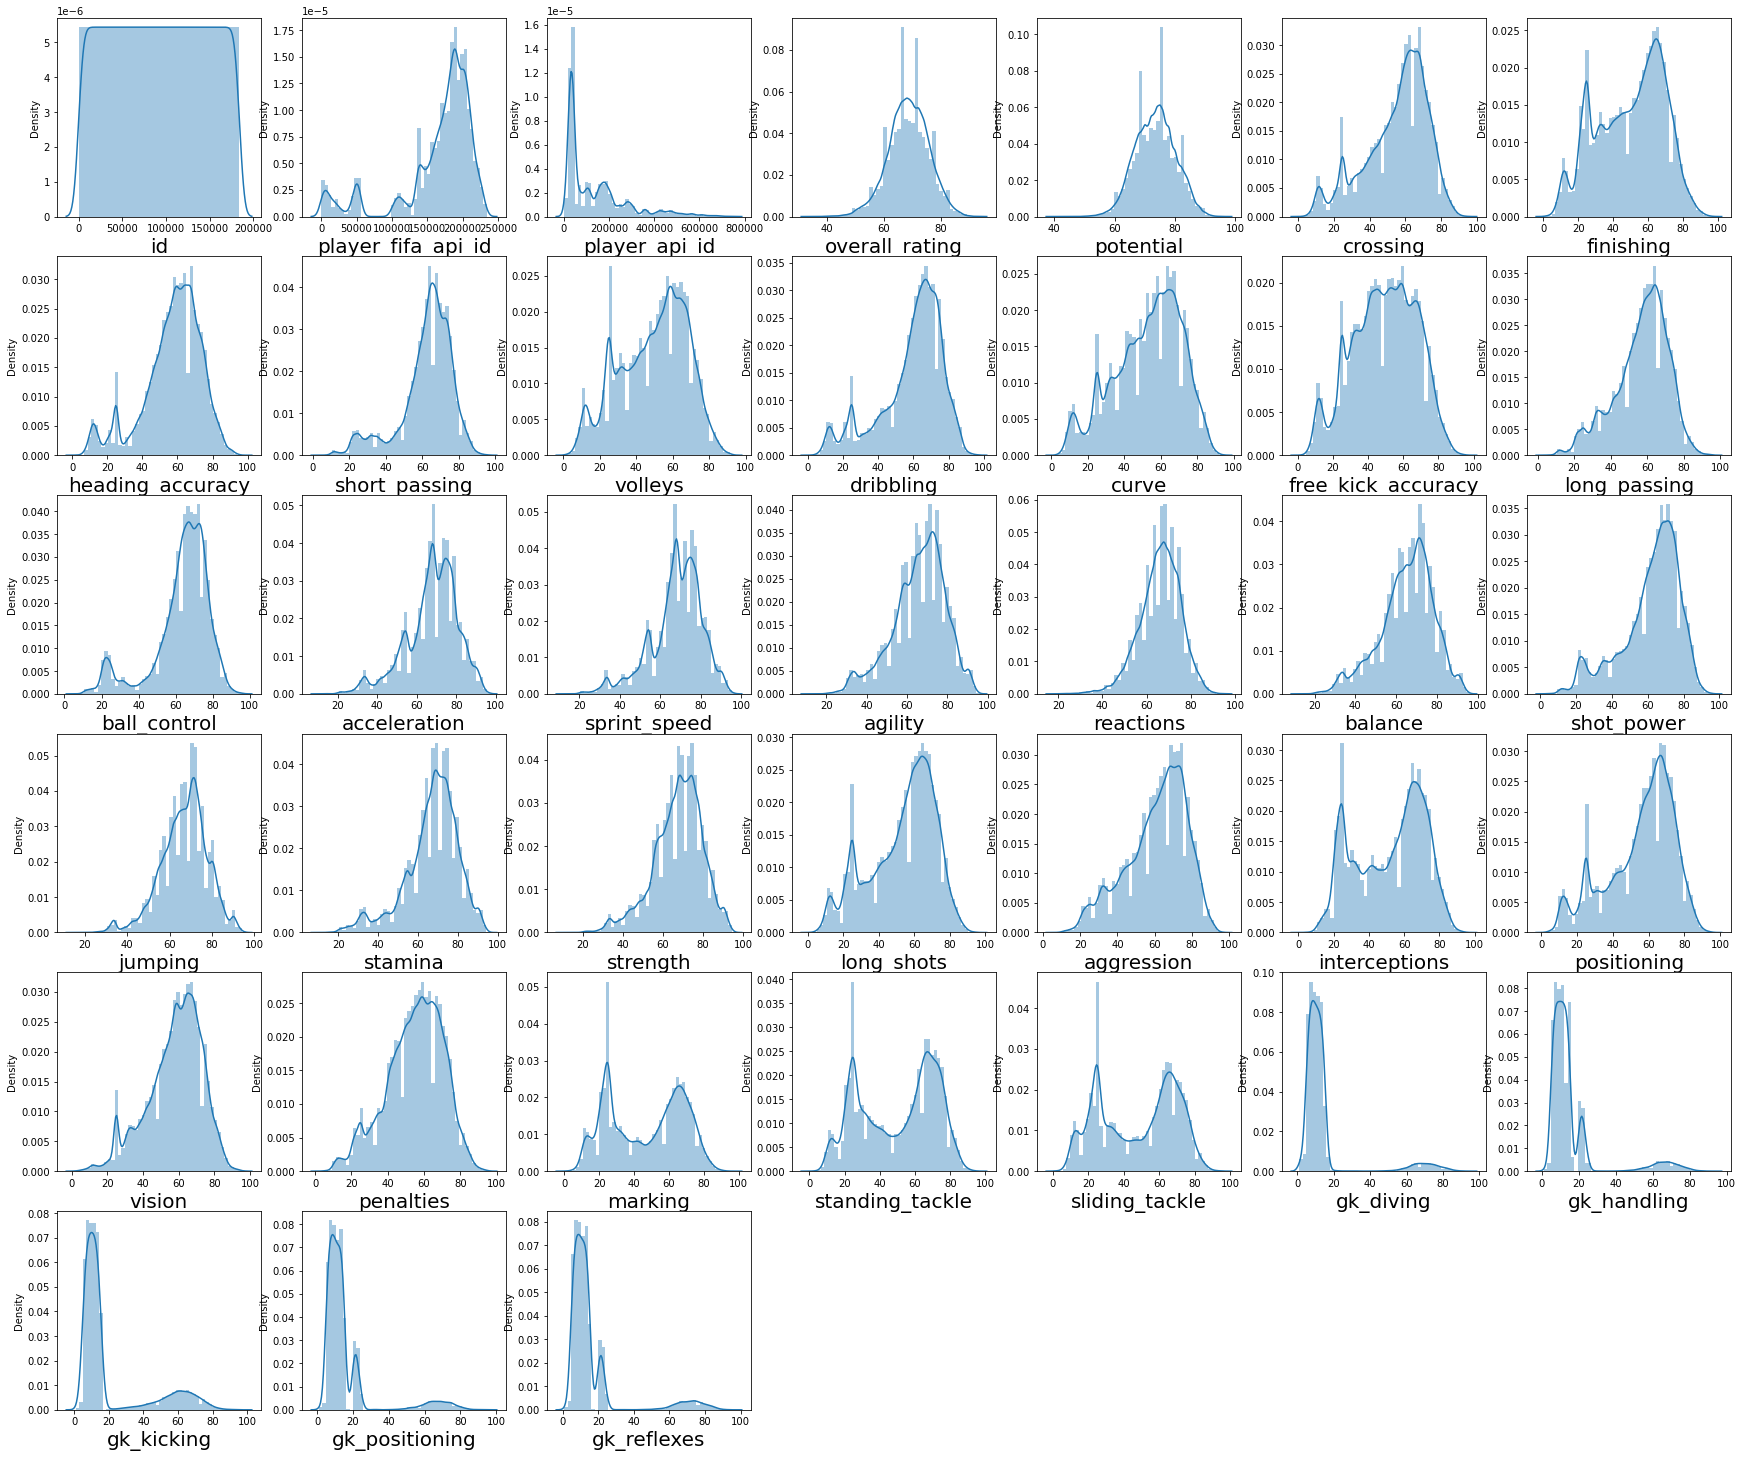

In [79]:
# let's see how data is distributed for every column
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in numerical_var:
    if plotnumber<=38 :     # as there are 9 columns in the data
        ax = plt.subplot(7,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# 1. DEALING WITH MISSING VALUES-- MEAN IMPUTATION FOR NORMALLY DISTRIBUTED FEATURES

In [77]:
## crossing, heading acc, shortpassing, dribbling,long passing,ball control, a

#penalties, vision,long shots,curve,potential ---- mean rest median
#### COLUMNS WHICH CAN BE IMPUTED WITH MEAN

df_copy = df.copy()

# making a backup 

In [91]:
##1. penalties

df['penalties'] = df['penalties'].fillna(round(df['penalties'].mean(),2))

In [96]:
##2 . vision

df['vision'] = df['vision'].fillna(round(df['vision'].mean(),2))

In [97]:
## 3. long_shots
df['long_shots'] = df['long_shots'].fillna(round(df['long_shots'].mean(),2))

In [98]:
## 4 . curve

df['curve'] = df['curve'].fillna(round(df['curve'].mean(),2))

In [99]:
## 5. potential

df['potential'] = df['potential'].fillna(round(df['potential'].mean(),2))

In [95]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

## 2. DEALING REST OF THE NUMERICAL MISSING VALUES WITH MEDIAN SINCE MOST OF THE DISTRIBUTIONS ARE SKEWED

In [101]:
numerical_var

['id',
 'player_fifa_api_id',
 'player_api_id',
 'overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

This code impute mean to the int columns and mode to the object columns making a list of both types of columns and imputing the missing value according to the conditions.


-------------------------------------------------------

cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [103]:
new_list_numerical = numerical_var[4:]

In [105]:
## REPLACING NAN OF ALL OTHER FEATURES WITH MEDIAN EXCEPT CATEGORICAL FEATURES
for column in df:
    
    if df[column].isnull().any():
        
        if column in new_list_numerical:
            
            df[column] = df[column].fillna(df[column].median())

In [106]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential                 0
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle     

## 3 . HANDLING MISSING CATEGORICAL VALUES 

In [108]:
categorical_var

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [112]:
### DATE HAS NO MISSING VALUe

# 1. preferred_foot

df['preferred_foot'].value_counts()

## NOMINAL FEATURE SO WILL USE MODE IMPUTATION

right    138409
left      44733
Name: preferred_foot, dtype: int64

C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

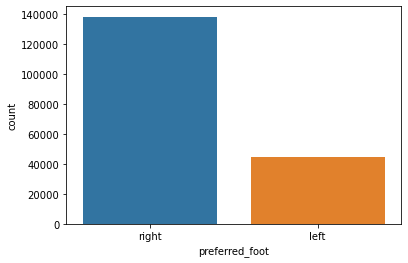

In [117]:
sns.countplot(df['preferred_foot'])

In [119]:
df['preferred_foot'] = df['preferred_foot'].fillna(df['preferred_foot'].mode()[0])

In [123]:
##2. attacking_work_rate

df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [125]:
### SINCE THE OTHER CLASSES CONTAIN VERY SMALL AMT OF DATA WE CAN COMBINE THEM INTO LOW CATEGORY

df['attacking_work_rate'] = df['attacking_work_rate'].fillna(df['attacking_work_rate'].mode()[0])

In [126]:
df['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [127]:
df['attacking_work_rate'] = df['attacking_work_rate'].map({'medium':'medium','high':'high','low':'low','None':'low','le':'low','norm':'low','stoc':'low','y':'low'})

In [128]:
df['attacking_work_rate'].value_counts()

medium    128300
high       42823
low        12855
Name: attacking_work_rate, dtype: int64

In [136]:
###3. defensive_work_rate

df['defensive_work_rate'] = df['defensive_work_rate'].fillna(df['defensive_work_rate'].mode()[0])

In [129]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [133]:
df['defensive_work_rate'] = df['defensive_work_rate'].map(
    {'medium':'medium','high':'high','low':'low',
 '_0':'low','o':'low','1':'low',
 'ormal':'low','2':'low','3':'low','5':'low','7':'low','0':'low','6':'low',
  '9':'low','4':'low','es':'low','ean':'low','tocky':'low','8':'low'}
)

In [134]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        25255
Name: defensive_work_rate, dtype: int64

In [137]:
df.isnull().sum()

id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating         836
potential                0
preferred_foot           0
attacking_work_rate      0
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
g

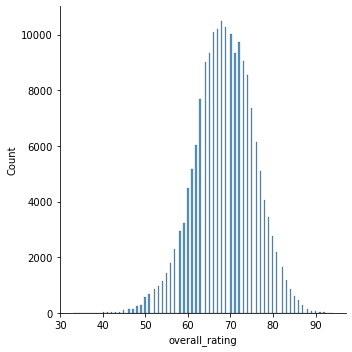

In [138]:
sns.displot(data = df, x = 'overall_rating',kind = 'hist')

# since target variable is normally distributed we can impute missing values using mean


In [139]:
df['overall_rating'] = df['overall_rating'].fillna(df['overall_rating'].mean())

In [140]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


## CONVERTING CATEGORICAL FEATURES INTO NUMERICAL FEATURES

In [141]:
df_copy_1 = df.copy()
### KEEPING A COPY

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183978 non-null  float64
 5   potential            183978 non-null  float64
 6   preferred_foot       183978 non-null  object 
 7   attacking_work_rate  183978 non-null  object 
 8   defensive_work_rate  183978 non-null  object 
 9   crossing             183978 non-null  float64
 10  finishing            183978 non-null  float64
 11  heading_accuracy     183978 non-null  float64
 12  short_passing        183978 non-null  float64
 13  volleys              183978 non-null  float64
 14  dribbling            183978 non-null  float64
 15  curve            

In [144]:
df['preferred_foot'].value_counts()

right    139245
left      44733
Name: preferred_foot, dtype: int64

In [145]:
df['preferred_foot'] = df['preferred_foot'].map({'right':0,'left':1})

In [147]:
###. HANDLING 2 ORDINAL FEATURES

In [148]:
df['attacking_work_rate'].value_counts()

medium    128300
high       42823
low        12855
Name: attacking_work_rate, dtype: int64

In [149]:
df['attacking_work_rate'] = df['attacking_work_rate'].map({'low':3,'high':2,'medium':1})

In [150]:
df['attacking_work_rate'].value_counts()

1    128300
2     42823
3     12855
Name: attacking_work_rate, dtype: int64

In [151]:
###3. defensive

df['defensive_work_rate'].value_counts()

medium    131682
high       27041
low        25255
Name: defensive_work_rate, dtype: int64

In [152]:
df['defensive_work_rate'] = df['defensive_work_rate'].map({'low':3,'high':2,'medium':1})

In [153]:
df['defensive_work_rate'].value_counts()

1    131682
2     27041
3     25255
Name: defensive_work_rate, dtype: int64

In [154]:
### LETS CHECK OUR DATA NOW

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183978 non-null  float64
 5   potential            183978 non-null  float64
 6   preferred_foot       183978 non-null  int64  
 7   attacking_work_rate  183978 non-null  int64  
 8   defensive_work_rate  183978 non-null  int64  
 9   crossing             183978 non-null  float64
 10  finishing            183978 non-null  float64
 11  heading_accuracy     183978 non-null  float64
 12  short_passing        183978 non-null  float64
 13  volleys              183978 non-null  float64
 14  dribbling            183978 non-null  float64
 15  curve            

In [156]:
#### LETS DROP UNNECESSARY FEATURES NOW

In [157]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [160]:
df = df.drop(columns=['id','player_fifa_api_id','player_api_id','date'])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183978 non-null  float64
 1   potential            183978 non-null  float64
 2   preferred_foot       183978 non-null  int64  
 3   attacking_work_rate  183978 non-null  int64  
 4   defensive_work_rate  183978 non-null  int64  
 5   crossing             183978 non-null  float64
 6   finishing            183978 non-null  float64
 7   heading_accuracy     183978 non-null  float64
 8   short_passing        183978 non-null  float64
 9   volleys              183978 non-null  float64
 10  dribbling            183978 non-null  float64
 11  curve                183978 non-null  float64
 12  free_kick_accuracy   183978 non-null  float64
 13  long_passing         183978 non-null  float64
 14  ball_control         183978 non-null  float64
 15  acceleration     

### FEATURE SELECTION AND OUTLIER TREATMENTS

In [163]:
df_copy_3 = df.copy()

In [164]:
corrmat = df.corr()

<AxesSubplot:>

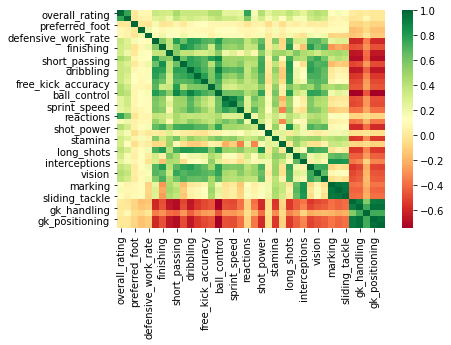

In [165]:
sns.heatmap(corrmat,cmap="RdYlGn")

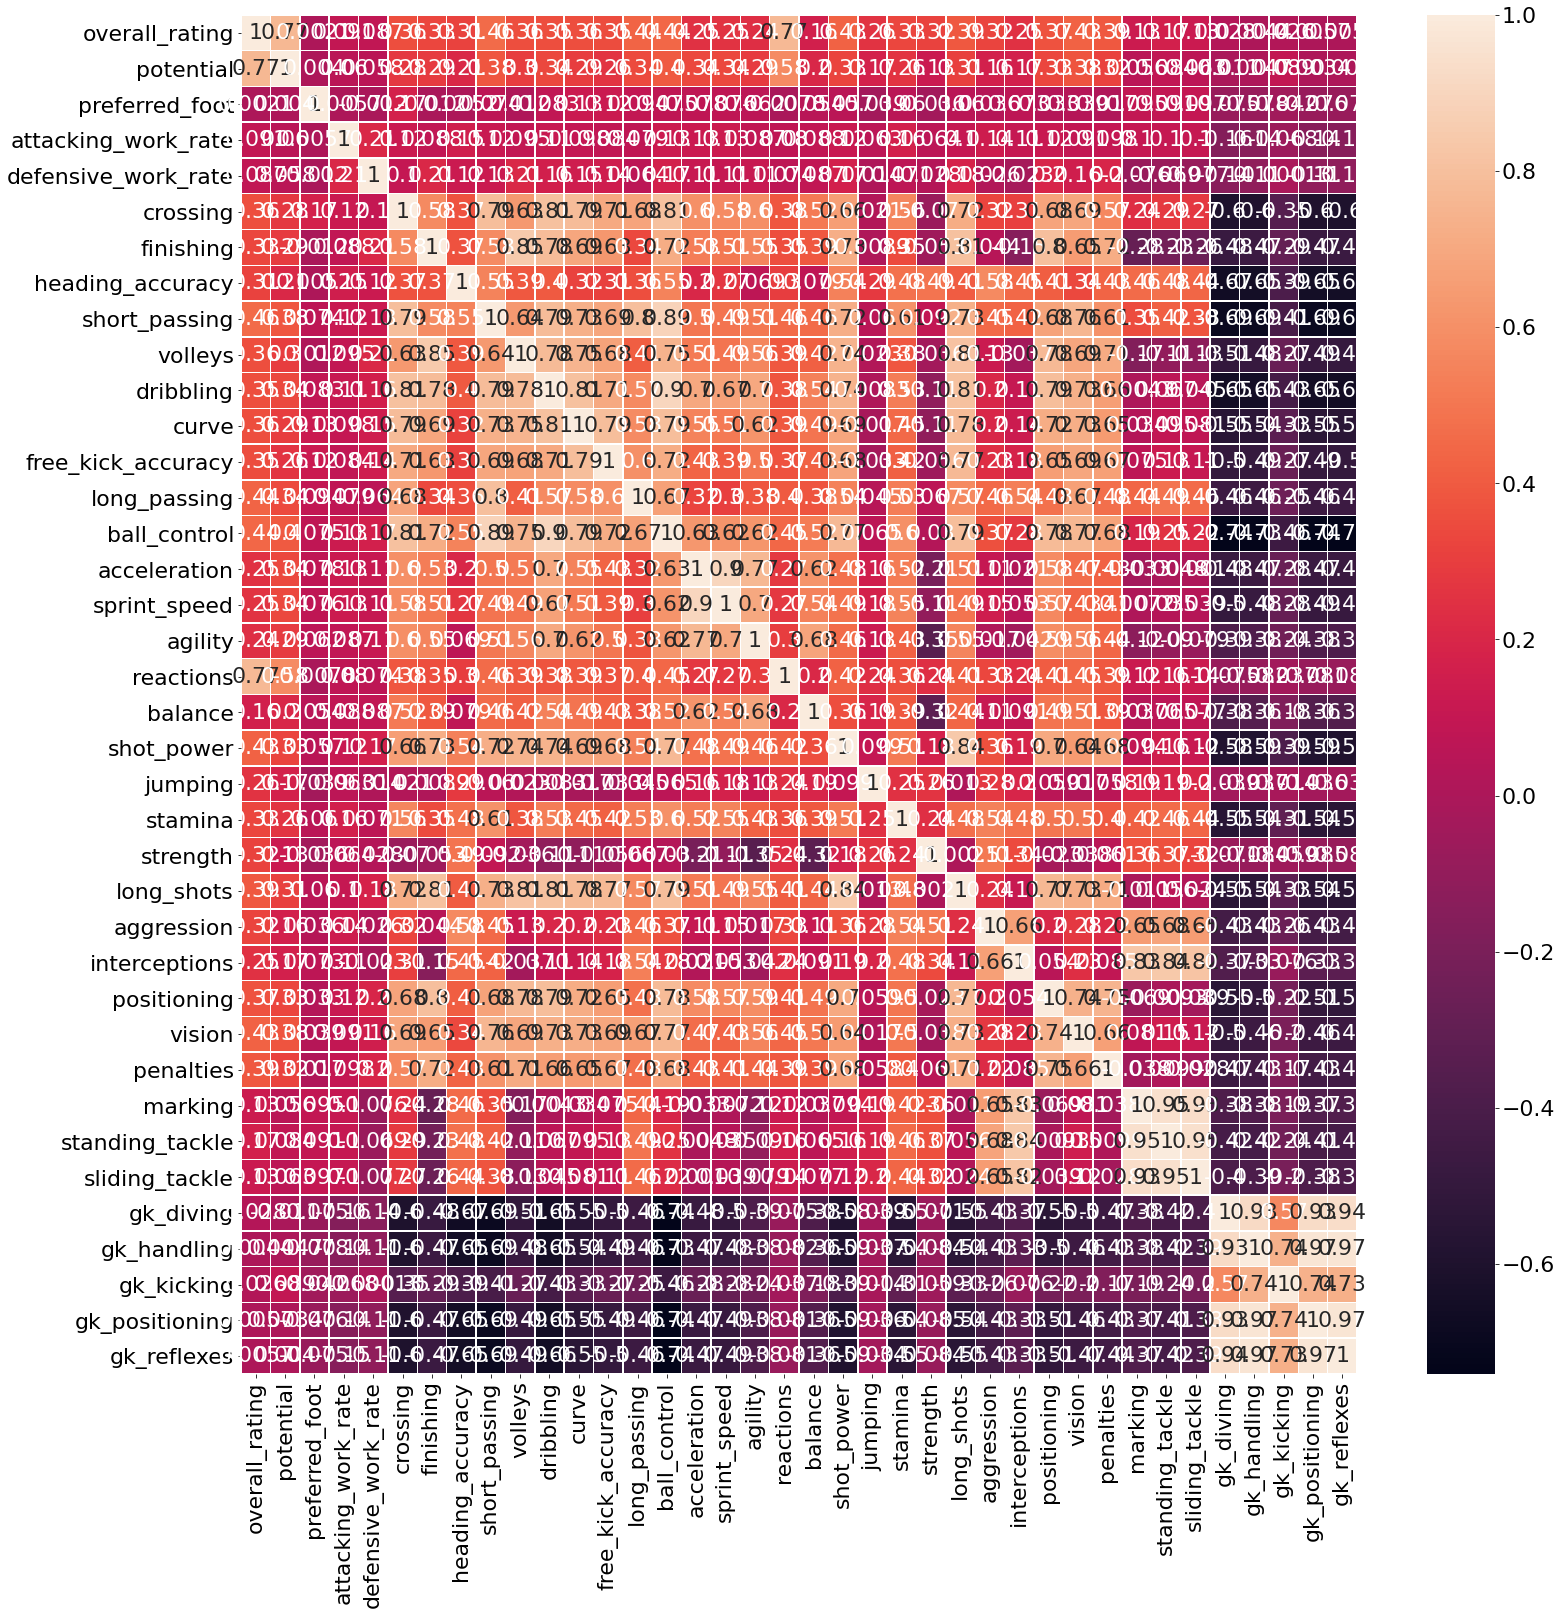

In [221]:
plt.figure(figsize = (25,25))

ax = sns.heatmap(corrmat, annot=True, linewidths=.5)

# 2. VIF 

In [168]:
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [169]:
y = df['overall_rating']

In [170]:
X = df.drop(columns = ['overall_rating'])

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [176]:
vif

,VIF,Features
0,2.142914,potential
1,1.079235,preferred_foot
2,1.087949,attacking_work_rate
3,1.120273,defensive_work_rate
4,4.893435,crossing
5,7.044473,finishing
6,4.195343,heading_accuracy
7,8.771930,short_passing
8,5.133511,volleys
9,9.823263,dribbling


# 3.Univariate selection

In [185]:
from sklearn.feature_selection import SelectKBest

In [188]:
y

0         67.0
1         67.0
2         62.0
3         61.0
4         61.0
          ... 
183973    83.0
183974    78.0
183975    77.0
183976    78.0
183977    80.0
Name: overall_rating, Length: 183978, dtype: float64

In [186]:
from sklearn.feature_selection import chi2

In [207]:
from sklearn.feature_selection import f_regression

In [213]:
from sklearn.feature_selection import f_regression
# assigning f and p values to 2 separate arrays
f_val, p_val = f_regression(X,y)

# creating a dictionary from the arrays
feature_dict={'features':X.columns.tolist(),
              'f_score':f_val.tolist()}

# creating a sorted dataframe from the dictionary
feature_df = pd.DataFrame(feature_dict).sort_values(by='f_score', ascending=False).reset_index(drop=True)

# printing 25 features with the highest scores
feature_df.iloc[:,:]#['columns'].tolist()

,features,f_score
0,reactions,266628.902551
1,potential,262476.464738
2,short_passing,48923.664048
3,ball_control,45224.417305
4,long_passing,42937.758015
5,vision,41314.916063
6,shot_power,41249.581953
7,penalties,33643.391001
8,long_shots,33480.299698
9,positioning,29176.722202


In [215]:
###
# observations we can eleminate features from gk diving etc even in VIF WE SAW HIGH VALUES

In [197]:
## 4. 

from sklearn.ensemble import ExtraTreesRegressor

In [198]:
model = ExtraTreesRegressor()

In [199]:
model.fit(X,y)

ExtraTreesRegressor()

In [200]:
print(model.feature_importances_)

[0.23339629 0.00107212 0.00114505 0.0011248  0.01840748 0.01011122
 0.02551197 0.03524061 0.00694873 0.02372156 0.00290469 0.00203667
 0.01923427 0.08659431 0.00364133 0.00394822 0.00183347 0.23177164
 0.00168099 0.0222612  0.00280382 0.00483175 0.01361399 0.01751476
 0.00845786 0.02486773 0.03996441 0.00755069 0.00490867 0.02669681
 0.03643254 0.01203984 0.01786306 0.01409615 0.00459739 0.01596756
 0.01520636]


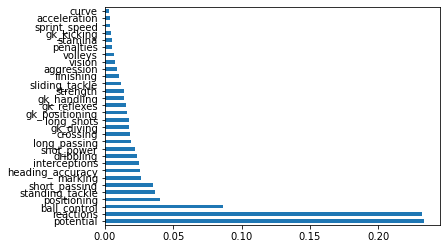

In [201]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize = (25,25))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [203]:
plt.rcParams.update({'font.size': 22})

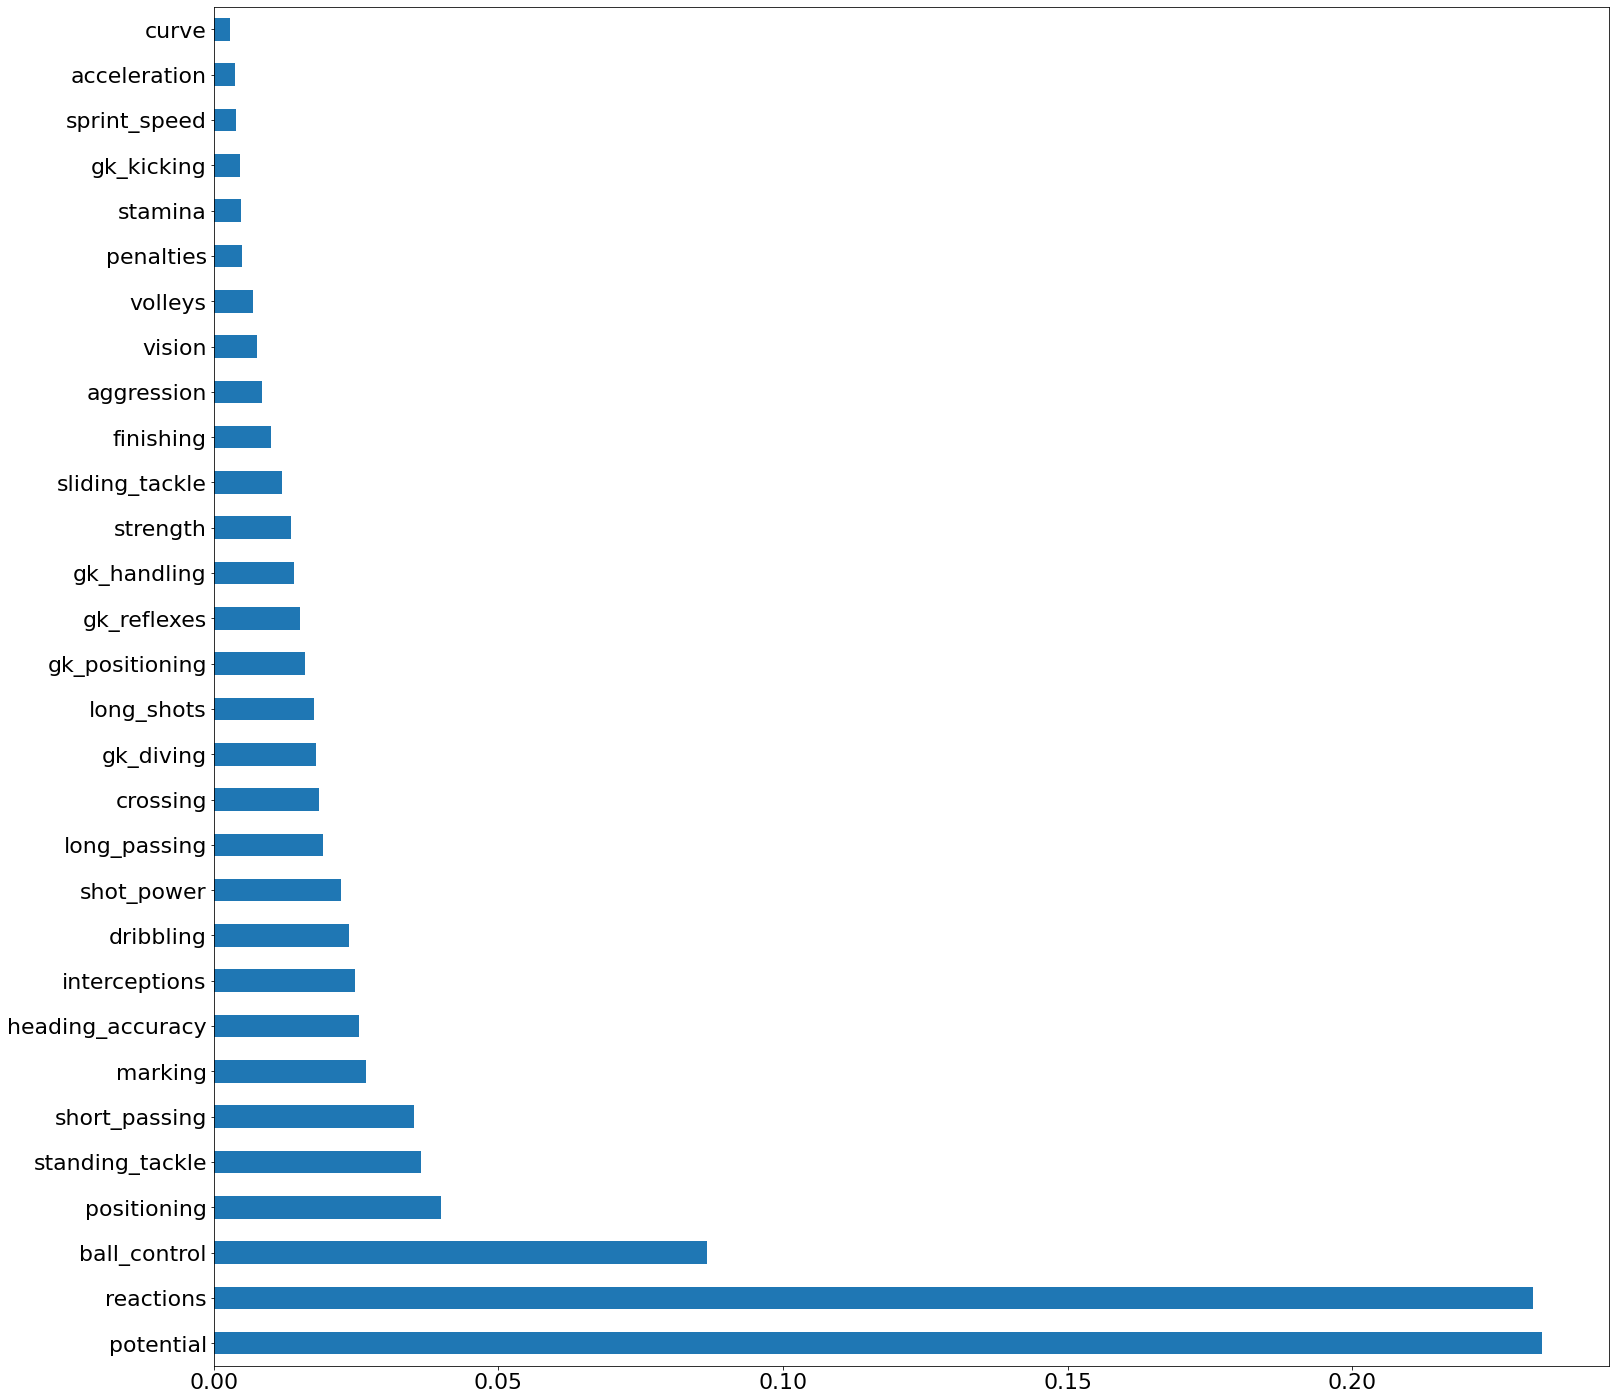

In [204]:
plt.figure(figsize = (25,25))

feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [217]:
### 5th method

from sklearn.feature_selection import VarianceThreshold
var_selector=VarianceThreshold(threshold=0.25)
df_var = var_selector.fit_transform(X)

In [218]:
df_var

array([[71.,  1.,  1., ..., 10.,  8.,  8.],
       [71.,  1.,  1., ..., 10.,  8.,  8.],
       [66.,  1.,  1., ..., 10.,  8.,  8.],
       ...,
       [80.,  1.,  3., ..., 73., 20., 20.],
       [81.,  1.,  3., ..., 73., 20., 20.],
       [81.,  1.,  3., ..., 78.,  7., 15.]])

# Method 5: Recursive Feature Elimination
The recursive feature elimination method tries to find the most optimized subset of features to include in a model. In this approach, a subset of features are formed and in each iteration, the worst-performing feature is dropped. As a result, the subset gets less in each step until the optimal subset is reached.
To utilize recursive feature elimination, I picked RFECV function from sklearn. A model is initiated and loaded in the RFE function where step=5 meaning that 5 features will be eliminated in each step and cv=3 for 3-fold cross-validation.

In [219]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV

# initiating a linear model
model = linear_model.LinearRegression()

# feeding the model to RFECV
rfe = RFECV(estimator=model, step=5, cv=3)

# fitting to the trained rfe model
rfe_fit = rfe.fit(X,y)

# zipping the column names and their rankings according to RFECV
rfe_dict = dict(zip(np.array(X.columns),rfe_fit.ranking_))

# picking the features ranked 1st in the above dictionary
selected = {}
for key, value in rfe_dict.items():
    if value==1:
        selected[key]=value
print(list(selected.keys()))

['potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [220]:
len(['potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'])

37

In [222]:
feature_df

,features,f_score
0,reactions,266628.902551
1,potential,262476.464738
2,short_passing,48923.664048
3,ball_control,45224.417305
4,long_passing,42937.758015
5,vision,41314.916063
6,shot_power,41249.581953
7,penalties,33643.391001
8,long_shots,33480.299698
9,positioning,29176.722202


In [223]:
X = X.drop(columns=['gk_diving','gk_kicking','gk_positioning','gk_reflexes','gk_handling','preferred_foot'])

In [224]:
X.columns

Index(['potential', 'attacking_work_rate', 'defensive_work_rate', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

# MODEL CREATION STARTS NOW

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
scaler_model =StandardScaler()

X_scaled_data = scaler.fit_transform(X)

# 1. Linear Regression

In [225]:
from sklearn.linear_model import LinearRegression

In [226]:
LR_model = LinearRegression()

In [228]:
df.to_csv('updated_data')

In [229]:
df_hhhh = pd.read_csv('updated_data')

In [230]:
df_hhhh.shape

(183978, 39)

In [231]:
df.shape

(183978, 38)

In [ ]:
df_hhhh